In [357]:
import random
department = ( " frozen " ,
" bakery " ,
" produce " ,
" alcohol " ,
" international " ,
" beverages " ,
" pets " ,
" dry goods pasta " ,
" bulk " ,
" personal care " ,
" meat seafood " ,
" pantry " ,
" breakfast " ,
" canned goods " ,
" dairy eggs " ,
" household " ,
" babies " ,
" snack " ,
" deli " ,
)
student_id_one = 202218932 # Replace with your student ID
student_id_two = None
seed = (student_id_one + student_id_two) // 2 if student_id_two else student_id_one
random.seed(seed)
selected_department = random.choices( department , k = 5 )
print(selected_department)

[' babies ', ' produce ', ' dairy eggs ', ' canned goods ', ' snack ']


In [358]:
# Chose snack dpt
import pandas as pd

path = "instacart-market-basket-analysis"

# init df for each csv and make copy
df_products = pd.read_csv(f"{path}/products.csv")
df_products_origin = df_products.copy()

df_orders = pd.read_csv(f"{path}/orders.csv")
df_orders_origin = df_orders.copy()

df_aisles = pd.read_csv(f"{path}/aisles.csv")
df_aisles_origin = df_aisles.copy()

df_order_products__train = pd.read_csv(f"{path}/order_products__train.csv")
df_order_products__train_origin = df_order_products__train.copy()


# filter products to show just snack products
df_dept_products = df_products[df_products["department_id"] == 19]


In [359]:
# checks to see if there are in null values in products csv

"""orders had null values for the "days since prior order" column for every users first purchase so we set that to 0
since by default when you purchase a product you wouldn't have had days from prior order"""
df_orders["days_since_prior_order"]  = df_orders["days_since_prior_order"].fillna(0)


"""all other files were clear of null values"""
#df_dept_products.isna().any().any()
#df_aisles.isna().any().any()
#df_order_products__train.isna().any().any()


'all other files were clear of null values'

In [360]:
""" Generalizing each aisle to smoothen data """
general_map = {
    61:  "desserts_aisle",
    103: "dessert_toppings_aisle",
    3:   "granola_bars_aisle",
    107: "chips_aisle",
    78:  "crackers_aisle",
    23:  "popcorn_jerky_aisle",
    50:  "travel_snacks_aisle",
    45:  "candy_aisle",
    46:  "gum_aisle",
    117: "travel_snacks_aisle",
    125: "trail_mix_aisle",
}
df_dept_products["general_products_aisle"] = df_dept_products["aisle_id"].map(general_map).fillna("other")

"""
df_dept_products[df_dept_products["aisle_id"] == 61].tail(50) # desserts aisle
df_dept_products[df_dept_products["aisle_id"] == 103].tail(50) # Dessert Toppings aisle
df_dept_products[df_dept_products["aisle_id"] == 3].head(50) # Granola Bars aisle
df_dept_products[df_dept_products["aisle_id"] == 107].head(50) # Chips aisle
df_dept_products[df_dept_products["aisle_id"] == 78].head(50) # Crackers aisle
df_dept_products[df_dept_products["aisle_id"] == 23].head(50) # Popcorn/Jerky aisle
df_dept_products[df_dept_products["aisle_id"] == 50].head(50) # Travel Snacks aisle
df_dept_products[df_dept_products["aisle_id"] == 45].head(50) # Candy aisle
df_dept_products[df_dept_products["aisle_id"] == 46].head(50) # Gum aisle
df_dept_products[df_dept_products["aisle_id"] == 117].head(50) # Travel Snack aisle
df_dept_products[df_dept_products["aisle_id"] == 125].head(20) # Trail Mix aisle
"""
df_dept_products



C:\Users\jluza\AppData\Local\Temp\ipykernel_4412\2913109937.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dept_products["general_products_aisle"] = df_dept_products["aisle_id"].map(general_map).fillna("other")


,product_id,product_name,aisle_id,department_id,general_products_aisle
0,1,Chocolate Sandwich Cookies,61,19,desserts_aisle
15,16,Mint Chocolate Flavored Syrup,103,19,dessert_toppings_aisle
24,25,Salted Caramel Lean Protein & Fiber Bar,3,19,granola_bars_aisle
31,32,Nacho Cheese White Bean Chips,107,19,chips_aisle
40,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,crackers_aisle
...,...,...,...,...,...
49661,49662,Bacon Cheddar Pretzel Pieces,107,19,chips_aisle
49664,49665,Super Dark Coconut Ash & Banana Chocolate Bar,45,19,candy_aisle
49665,49666,Ginger Snaps Snacking Cookies,61,19,desserts_aisle
49670,49671,Milk Chocolate Drops,45,19,candy_aisle


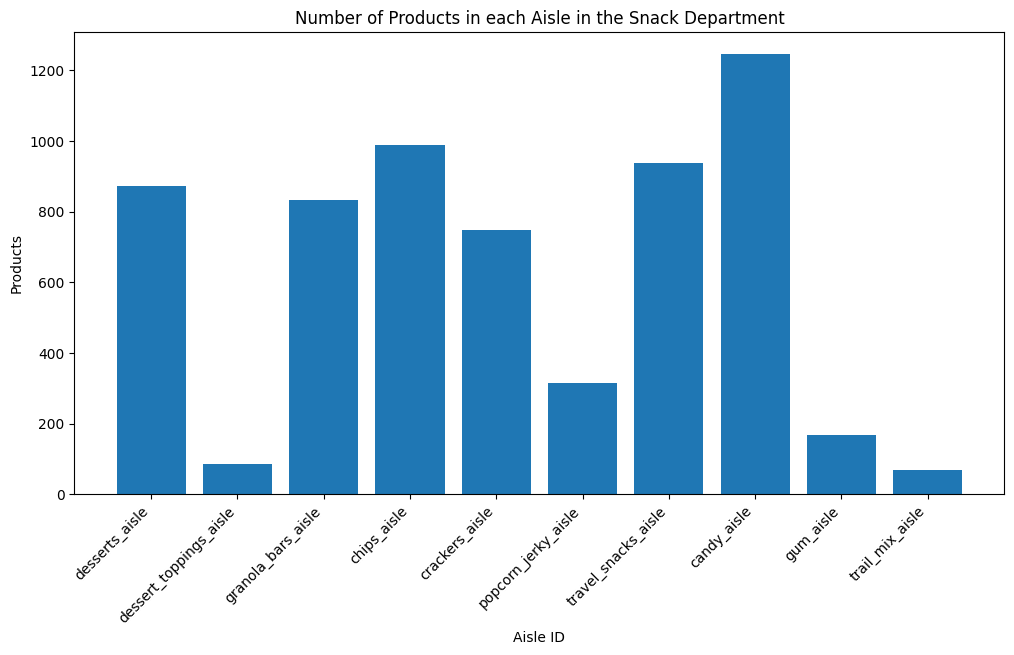

In [361]:
#  61, 103,   3, 107,  78,  23,  50,  45,  46, 117, 125
import matplotlib.pyplot as plt

# obtain the unique aisle id's in the dept and get their count of products
unique_aisles = df_dept_products["general_products_aisle"].unique()

# returns dictionary of aisle id's (key) and the number of products in aisle (value)
def count(data, ids):
    aisle_dict = {}
    for i in ids:
        aisle_dict[i] = data[data["general_products_aisle"] == i].shape[0]
    return aisle_dict
dict = count(df_dept_products, unique_aisles)

plt.figure(figsize=(12,6))
plt.bar([str(k) for k in dict.keys()], list(dict.values()))
plt.xlabel("Aisle ID")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Products")
plt.title("Number of Products in each Aisle in the Snack Department")

plt.show()




In [362]:
df_order_products__train[df_order_products__train["order_id"] == 3421058]

,order_id,product_id,add_to_cart_order,reordered
1384602,3421058,15629,1,1
1384603,3421058,4347,2,1
1384604,3421058,34466,3,1
1384605,3421058,6244,4,1
1384606,3421058,6858,5,1
1384607,3421058,30316,6,1
1384608,3421058,35578,7,0
1384609,3421058,32650,8,1


In [363]:
df_orders[df_orders["user_id"] == 136952]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2274316,2133195,136952,prior,1,6,19,0.0
2274317,617781,136952,prior,2,0,18,8.0
2274318,1049150,136952,prior,3,0,17,14.0
2274319,1699905,136952,prior,4,0,18,7.0
2274320,3325603,136952,prior,5,1,19,1.0
2274321,1354557,136952,prior,6,3,17,16.0
2274322,2752300,136952,prior,7,6,13,10.0
2274323,3334094,136952,prior,8,6,14,7.0
2274324,757360,136952,prior,9,4,18,12.0
2274325,447066,136952,prior,10,0,19,3.0


In [364]:
# apply intersection to identify how many products from the dept were bought in an order
df_intersection = pd.merge(df_order_products__train, df_dept_products, how="inner")

# Calculates % of orders that has atleast 1 snack in their order
percentage = len(df_intersection["order_id"].unique()) / len(df_order_products__train["order_id"].unique())
df_intersection

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,general_products_aisle
0,38,11913,1,0,Shelled Pistachios,117,19,travel_snacks_aisle
1,98,43560,9,1,"Crackers, Oyster",78,19,crackers_aisle
2,112,41860,3,0,Sea Salt Baked Potato Chips,107,19,chips_aisle
3,112,22425,10,0,Hickory Honey Barbeque Baked Potato Chips,107,19,chips_aisle
4,112,11776,11,0,Baked Sea Salt & Vinegar Potato Chips,107,19,chips_aisle
...,...,...,...,...,...,...,...,...
118857,3420996,24035,3,1,Coconut Chocolate Bar,3,19,granola_bars_aisle
118858,3420996,36205,4,0,Peanut Butter Egg White Protein Bar,3,19,granola_bars_aisle
118859,3420996,29967,5,0,Protein Bar Chocolate Sea Salt,3,19,granola_bars_aisle
118860,3421058,6858,5,1,Classic Britannia Crisps,78,19,crackers_aisle


In [365]:
# obtain the number of snacks purchased in each transaction and create new column
df_intersection["snack_count"] = df_intersection.groupby("order_id")["product_id"].transform("size")
avg = df_intersection["snack_count"].agg("mean")
snack_dict = {}
for i in range(1, 46):
    if df_intersection[df_intersection["snack_count"] == i]["order_id"].nunique() <= 0:
        continue
    else:
        snack_dict[i] = df_intersection[df_intersection["snack_count"] == i]["order_id"].nunique()
snack_dict

{1: 28944,
 2: 13903,
 3: 6813,
 4: 3380,
 5: 1803,
 6: 1021,
 7: 524,
 8: 339,
 9: 198,
 10: 121,
 11: 73,
 12: 53,
 13: 33,
 14: 28,
 15: 13,
 16: 9,
 17: 4,
 18: 11,
 19: 9,
 20: 3,
 21: 4,
 22: 2,
 23: 1,
 24: 2,
 25: 1,
 26: 1,
 28: 2,
 29: 2,
 30: 1,
 33: 1,
 34: 1,
 38: 1,
 45: 1}

In [368]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


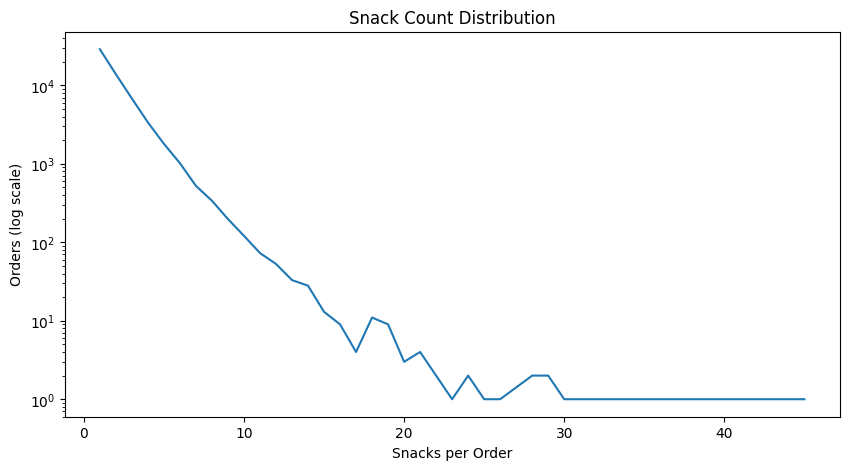

In [369]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(x=list(snack_dict.keys()), y=list(snack_dict.values()))
plt.yscale("log")
plt.xlabel("Snacks per Order")
plt.ylabel("Orders (log scale)")
plt.title("Snack Count Distribution")
plt.show()